# Exercice 4 – Adapter un réseau à un problème donné

1) Charger le dataset MNist et visualiser les données chargées. Affichez les premières
images du jeu de données. Que contient ce dataset et quel est son objectif ?

In [72]:
import pandas as pd 
from sklearn import datasets
import tensorflow as tf
mnist = datasets.load_digits()
Y = mnist.target

This dataset contains images of writed digited with (8x8 pixels). The goal of this dataset is to predict the right number based on the image of the digit.

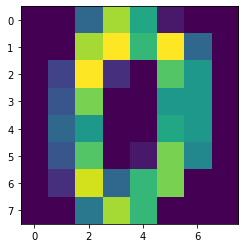

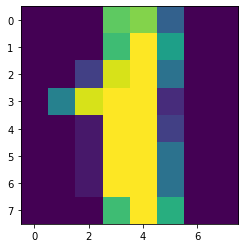

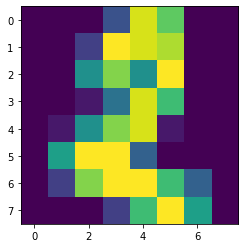

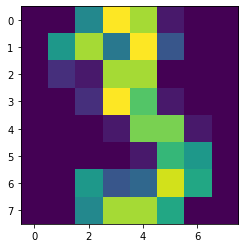

In [73]:
import matplotlib.pyplot as plt
# images of the first digits
for x in range(0,4):
    plt.imshow(mnist.images[x])
    plt.show()

2) Modifier les données pour : </br>
a. Linéariser les données en deux dimensions.

In [74]:
n_samples = len(mnist.images)
X = mnist.images.reshape((n_samples, -1))

b. Normaliser les données

In [75]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
X = scal.fit_transform(X)

We use StandardScaler in order to normalize our data

c. Transformer le vecteur de classes pour qu'il soit utilisable par un réseau de
neurones.

In [76]:
Y = tf.keras.utils.to_categorical(Y, num_classes = 10)

3) Entraîner l'architecture de l'exercice précédent à ce nouveau problème. Attention à la
taille des couches d'entrée et de sortie !

In [77]:
from sklearn.model_selection import train_test_split
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1234)

# shapes
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1347, 64)
(450, 64)
(1347, 10)
(450, 10)


In [78]:
# we fix the random state
tf.random.set_seed(1234)

# Definition of our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(16, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# optimizer definition
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                170       
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [79]:
# training
history = model.fit(X_train, Y_train,validation_split=0.1, epochs=100, verbose=False)

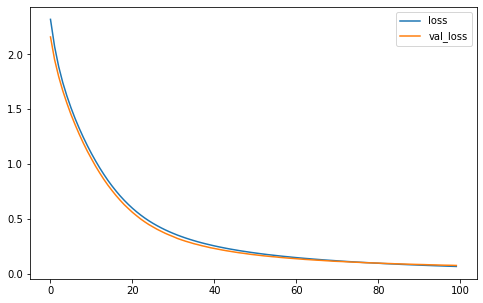

In [80]:
import matplotlib.pyplot as plt
# plot loss vs val_loss to avoid overfitting
pd.DataFrame(history.history).drop(["accuracy", "val_accuracy"], axis=1).plot(figsize=(8,5))
plt.show()

In [81]:
from sklearn.metrics import accuracy_score
print('results:')
print('accuracy: {:2.5}'.format(accuracy_score(model.predict(X_test).argmax(axis=1), Y_test.argmax(axis=1))))

results:
accuracy: 0.96222


Our previous model is very accurate on this dataset, by just changing the input and output shapes.

4) Entraîner le réseau de quelques epochs avec une taille de batch de 128. Observez le
score du réseau. Que pensez-vous de ce résultat ?

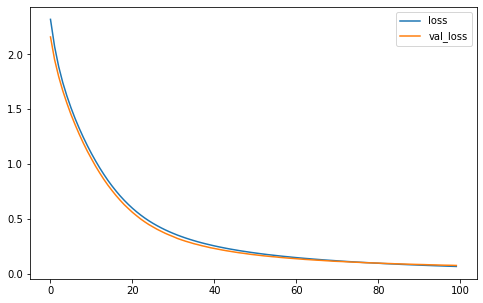

In [82]:
# we fix the random state
tf.random.set_seed(1234)

# Definition of our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(16, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# optimizer definition
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# training
model.fit(X_train, Y_train,validation_split=0.1,batch_size=128, epochs=100, verbose=False)

# plot loss vs val_loss to avoid overfitting
pd.DataFrame(history.history).drop(["accuracy", "val_accuracy"], axis=1).plot(figsize=(8,5))
plt.show()

In [83]:
print('results:')
print('accuracy: {:2.5}'.format(accuracy_score(model.predict(X_test).argmax(axis=1), Y_test.argmax(axis=1))))

results:
accuracy: 0.95111


By default batch_size = 32, we can expect that when we increase the batch size, the accuracy will increase. </br>
In this case the accuracy is decreasing (1% difference). </br>
Batch_size are often defined based on your power of calculation, for big datasets of images we prefer using small batch_size because of performances. </br>
In our case there is no performance limitation because it's a small dataset, but sometimes you will have better results using smaller batch_size than to take all at once.